In [15]:
import pandas as pd

from sklearn.metrics import f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import uniform, truncnorm, randint

In [2]:
train = pd.read_csv("data/train.csv")
X, y = train[['latitude', 'longitude']], train['label']

### Randomized Search CV

In [24]:
CV = 10
RANDOM_SEED = 257
PARAM_DIST_RF = {
    "n_estimators": randint(4,200),
    "criterion": ["gini", "entropy", "log_loss"],
    "min_samples_split": randint(2,4),
    "min_samples_leaf": uniform(1, 3),
    "max_features": truncnorm(a=0, b=1, loc=0.25, scale=0.1)
}

PARAM_DIST_KN = {
    "n_neighbors": randint(4, 10),
    "leaf_size": randint(30, 50),
    "p": randint(1,4)
}

In [25]:
rf = RandomForestClassifier()
kn = KNeighborsClassifier()

In [26]:
def best_parameters_search(model, params, cv, random_state):
    rscv = RandomizedSearchCV(model, params, random_state=random_state, cv=cv)
    search = rscv.fit(X, y)
    best_rf = search.best_estimator_
    return best_rf.get_params()

In [27]:
best_rf_params = best_parameters_search(rf, PARAM_DIST_RF, CV, RANDOM_SEED)
best_kn_params = best_parameters_search(kn, PARAM_DIST_KN, CV, RANDOM_SEED)

### Evaluation with best set of parameters

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=RANDOM_SEED, stratify=y)

In [29]:
rfc = RandomForestClassifier(**best_rf_params)
rfc.fit(X_train, y_train)
rfc_preds = rfc.predict(X_test)
f1_score(y_test, rfc_preds, average="macro")

0.2222222222222222

In [30]:
knc = KNeighborsClassifier(**best_kn_params)
knc.fit(X_train, y_train)
knc_preds = knc.predict(X_test)
f1_score(y_test, knc_preds, average="macro")

0.5889545108941916

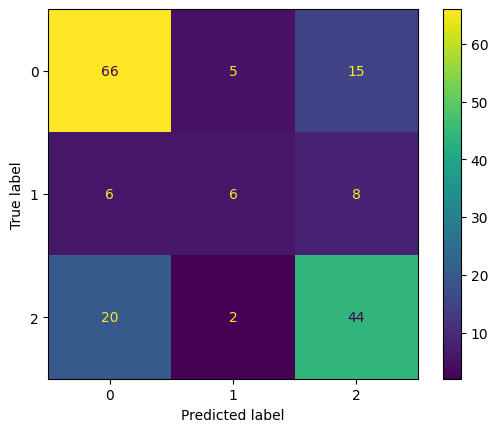

In [31]:
ConfusionMatrixDisplay.from_estimator(knc, X_test, y_test)